# TP OpenMP - October 2022

Florian Rascoussier

Bastien Barbe

Ce notebook constitue une étude comparative de méthodes de parallélisation CUDA sur GPU pour différentes applications.

## Part 1 : Pi

Ce programme calcule la valeur de pi en un nombre d'étapes renseignées par l'utilisateur.

### Compilation

In [58]:
# script params
EXEC: bool = True

In [37]:
# create /bin if it does not exist
!mkdir -p bin

# compile the programs
!nvcc -o bin/tp_cuda_part_1_pi_multiblock_1_threadperblock tp_cuda_part_1_pi_multiblock_1_threadperblock.cu -O3
!nvcc -o bin/tp_cuda_part_1_pi_multithread tp_cuda_part_1_pi_multithread.cu -O3
!nvcc -o bin/tp_cuda_part_1_pi_multithread_shared tp_cuda_part_1_pi_multithread_shared.cu -O3
!nvcc -o bin/tp_cuda_part_1_pi_multithread_full_reduction tp_cuda_part_1_pi_multithread_full_reduction.cu -O3 -g

# cuda-memcheck ./bin/tp_cuda_part_1_pi_basic -T 1000 -N 100000

### Performance evaluation

In [64]:
# global vars
csv_result_file = "stats.csv"
csv_headers = {
    'version': str,
    'B': int,
    'T': int,
    'N': int,
    'runtime' : float
}

B_values = [1, 32, 64, 128, 256]
N_values = [1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]
T_values = [1, 32, 64, 128, 256]

# heatmap for N, B, T

color_class = {
    "onethreadperblock": "red",
    "multithread": "orange",
    "multithread_shared": "blue",
    "multithread_reduction": "green"
}

repeats = 5

In [65]:
import os
import subprocess

def delete_old_csv_file():
    try:
        os.remove(csv_result_file)
    except OSError:
        pass

def create_csv_file():
    print(f"Creating NEW CSV file ({csv_result_file})")
    f = open(csv_result_file, "w")
    f.write(",".join(csv_headers.keys()) + "\n")
    f.close()

# execute the programs
def run_program(
    program_filepath: str, B: int, T: int, N: int
):
    args = (program_filepath, 
        "-B", str(B), 
        "-T", str(T),
        "-N", str(N)
    )
    popen = subprocess.Popen(args, stdout=subprocess.PIPE)
    popen.wait()

print("Program executions")
def exec_instances():
    for B in B_values:
        for T in T_values:
            for N in N_values:
                print(f" + Running programs (B: {B}, T: {T}, N: {N})")
                for _ in range(repeats):
                    run_program("bin/tp_cuda_part_1_pi_multiblock_1_threadperblock", B,T,N)
                    run_program("bin/tp_cuda_part_1_pi_multithread", B,T,N)
                    run_program("bin/tp_cuda_part_1_pi_multithread_shared", B,T,N)
                    run_program("bin/tp_cuda_part_1_pi_multithread_full_reduction", B,T,N)
                    print("*", end = '')
                print()

if EXEC:
    delete_old_csv_file()
    create_csv_file()
    exec_instances()
else:
    print(f"WARN: EXEC = {EXEC}. No C++ program execution.")



Program executions
Creating NEW CSV file (stats.csv)
 + Running programs (B: 1, T: 1, N: 1000)
*****
 + Running programs (B: 1, T: 1, N: 10000)
*****
 + Running programs (B: 1, T: 1, N: 100000)
*****
 + Running programs (B: 1, T: 1, N: 1000000)
*****
 + Running programs (B: 1, T: 1, N: 10000000)
*****
 + Running programs (B: 1, T: 1, N: 100000000)
*****
 + Running programs (B: 1, T: 1, N: 1000000000)
*****
 + Running programs (B: 1, T: 32, N: 1000)
*****
 + Running programs (B: 1, T: 32, N: 10000)
*****
 + Running programs (B: 1, T: 32, N: 100000)
*****
 + Running programs (B: 1, T: 32, N: 1000000)
*****
 + Running programs (B: 1, T: 32, N: 10000000)
*****
 + Running programs (B: 1, T: 32, N: 100000000)
*****
 + Running programs (B: 1, T: 32, N: 1000000000)
*****
 + Running programs (B: 1, T: 64, N: 1000)
*****
 + Running programs (B: 1, T: 64, N: 10000)
*****
 + Running programs (B: 1, T: 64, N: 100000)
*****
 + Running programs (B: 1, T: 64, N: 1000000)
*****
 + Running programs (B: 

### Performance analysis

,version,B,T,N,runtime
0,onethreadperblock,1,1,1000,0.070791
1,multithread,1,1,1000,0.070322
2,multithread_shared,1,1,1000,0.065190
3,multithread_reduction,1,1,1000,0.046470
4,onethreadperblock,1,1,1000,0.043581
5,multithread,1,1,1000,0.044384
6,multithread_shared,1,1,1000,0.043162
7,multithread_reduction,1,1,1000,0.042956
8,onethreadperblock,1,1,1000,0.064330
9,multithread,1,1,1000,0.042663


/home/onyr/anaconda3/envs/py310omp/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/onyr/anaconda3/envs/py310omp/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/onyr/anaconda3/envs/py310omp/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/onyr/anaconda3/envs/py310omp/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/onyr/anaconda3/envs/py310omp/l

Text(0.5, 0.98, 'Compute Pi with CUDA optimized for different configurations')

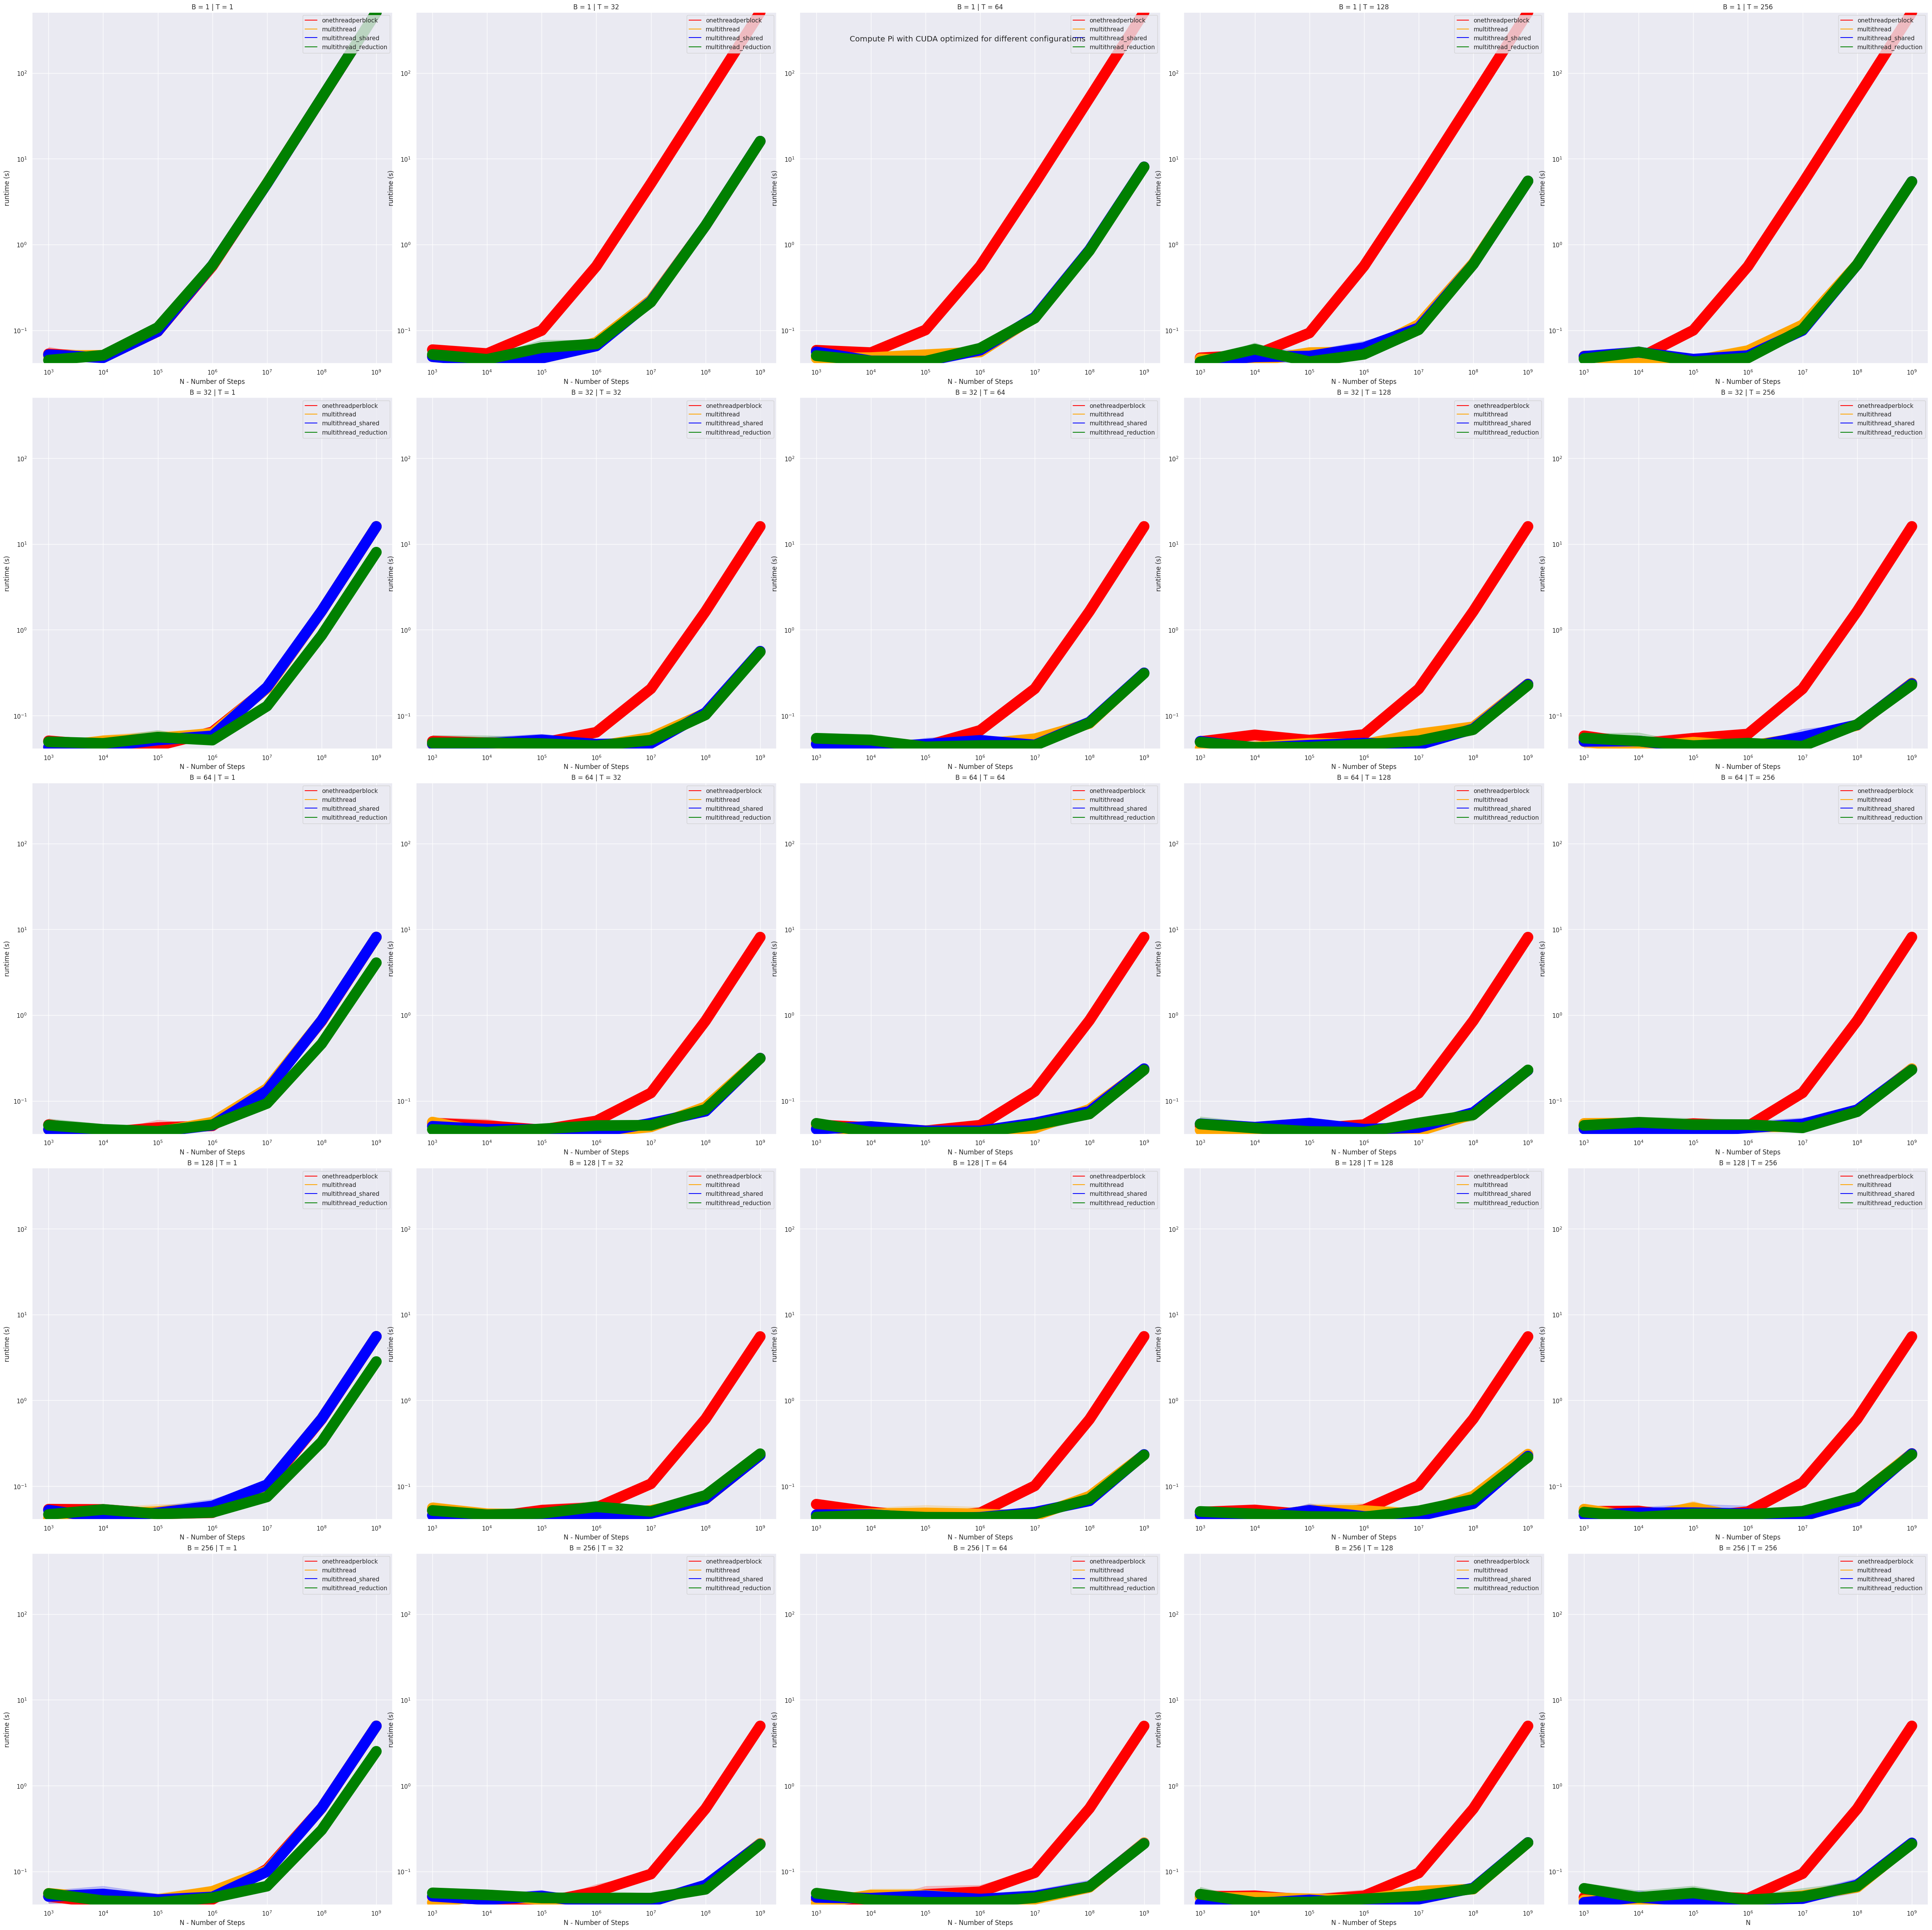

In [66]:
# superposed big graph
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from numpy import genfromtxt
import pandas as pd
import seaborn as sns

sns.set()


df = pd.read_csv(
    csv_result_file,
    header=0, # line number of header
    dtype=csv_headers
)
display(df.head(10))

# filter out 0 runtime values
df = df[df.runtime > 0]

#fig, ax = plt.subplots(figsize=(18,16))
#fig.suptitle(f"Compute Pi with CUDA optimized for different configurations")

# display legend for hue inside the subplots
g = sns.FacetGrid(
    data=df, 
    hue="version",
    col="T",
    row="B",
    palette=color_class, 
    height=10, 
    legend_out=True,
    despine=False,
    sharex=False,
    sharey=False
).map(sns.lineplot, "N", "runtime").set(xlabel="N - Number of Steps", ylabel="runtime (s)")


# set y axis to the same scale
# lower_bound = min([ax.get_ylim()[0] for ax in g.axes.flat])
# upper_bound = max([ax.get_ylim()[1] for ax in g.axes.flat])
for ax in g.axes.flat:
    ax.set_ylim(df.runtime.min(), df.runtime.max())
    # display legend for every subplot
    ax.legend(loc='upper right')
    # increase thickness of the lines
    for line in ax.lines:
        line.set_linewidth(20)
    # add legend for x and y axis for every subplot
    ax.set_xscale("log")
    ax.set_yscale("log")

# add legend for x and y axis
plt.xlabel("N")
plt.ylabel("runtime (s)")

# add graph title
g.figure.suptitle(f"Compute Pi with CUDA optimized for different configurations")

# # display legend for hue outside the subplots above the graph
# plt.legend(
#     title="version",
#     loc='upper center',
#     bbox_to_anchor=(0.5, -0.05),
#     fancybox=True,
#     shadow=True,
#     ncol=5
# )


### Discussion

Sur la première ligne, on peut remarqu clairement la ligne rouge correspondant au programme `onethreadperblock`. Évidement, pour B=1 et T=1, on obtient un code séquentiel dans tout les programmes, et c'est ce que l'on observe: les programmes se comportent tous comme la courbe du code séquentiel. Celle-ci se démarque des autres, notamment parce qu'elle ne change pas malgré l'augmentation du nombre de threads. C'est un résultat attendu puisque dans ce programme, le nombre de threads par bloc est toujours fixé à 1. Ses performances sont donc moindres face à l'augmentation du nombre de calculs (N) par rapport aux autres programmes qui utilisent le multithreading. Pour cette première ligne, on peut aussi noter une légère amélioration des performances pour les programmes utilisant le multithreading GPU quand T augmente. Distinguer le meilleur programme dans les 3 restants est cependant difficile, tant les courbes et les intervalles de confiance se croisent et se chevauchent.

A partir de la deuxième ligne, les programmes sont tous lancés en mode multi-blocs. Lorsqu'il y a qu’un seul thread par bloc, les performances des différents programmes sont sensiblement les mêmes, à l’exception de `mutlithread_reduction` qui est légèrement plus rapide. On peut poser comme hypothèse qu’il tire son avantage de la réduction, qui lui permet de calculer la somme des aires plus rapidement qu’avec une addition atomique, comme c’est le cas des trois autres programmes. On pourrait s’attendre à ce que cet avantage soit conservé ou même amplifié avec l’augmentation du nombre de thread mais l’exact contraire se produit. Plus le nombre de thread est élevé, plus le nombre de réductions à effectuer est conséquent. Ce surplus de calcul semble donc contrebalancer l’avantage de la réduction sur les additions atomiques. De plus, le programme `onethreadperblock` est bloqué à un thread par bloc, ce qui explique ces performances constantes en fonction de l’augmentation du nombre de threads pour une taille de bloc donnée. On constate également que pour les programmes utilisant les addition atomiques, l’utilisation de la mémoire partagée ne semble pas avoir d’influence sur les performances. Ces programmes sont possiblement bridés par l’addition atomique utilisée pour le calcul de la somme de tous les blocs.

On constate que le nombre de thread utilisé pour les calculs n’a que peu d’influence sur la rapidité de ces derniers, à partir du moment où ce nombre de thread est supérieur ou égal à 32.

Si l’on regarde maintenant le graphique par colonne, c’est à dire pour un nombre de bloc variable et un nombre de thread fixe, on constate que, contrairement aux nombre de threads, ces derniers ont une grande influence sur la performances des programmes, quelque soit la version utilisée. Ces performances stagnes néanmoins à partir d’un nombre de blocs supérieur à 128. Ce phénomène peut possiblement s’expliquer par un nombre trop élevé d’accès concurrents à la variable stockant le résultat de la somme.